Accuracy: 0.4

Confusion Matrix:
 [[ 5  8]
 [10  7]]

Classification Report:
               precision    recall  f1-score   support

           0       0.33      0.38      0.36        13
           1       0.47      0.41      0.44        17

    accuracy                           0.40        30
   macro avg       0.40      0.40      0.40        30
weighted avg       0.41      0.40      0.40        30



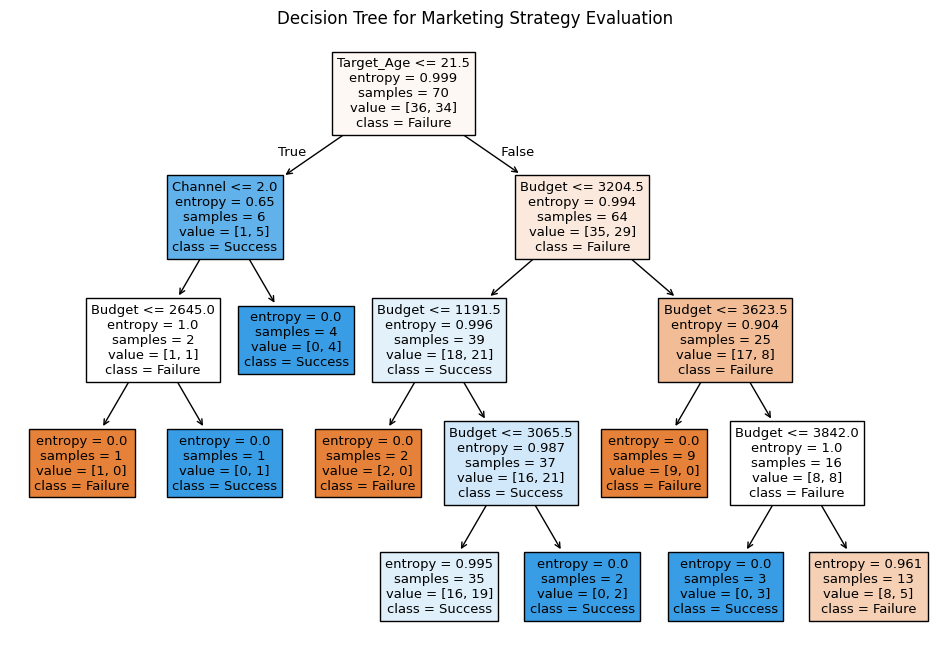

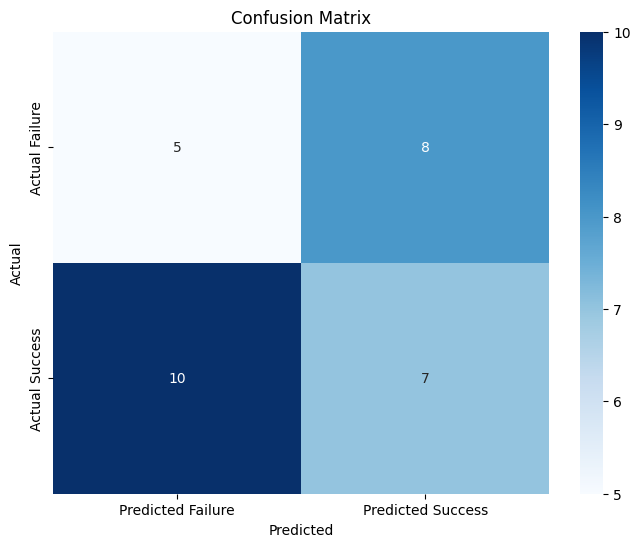

In [1]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns
data = {
    'Budget': np.random.randint(1000, 5000, 100),
    'Channel': np.random.choice(['Social Media', 'TV', 'Radio', 'Online'], 100),
    'Target_Age': np.random.randint(18, 60, 100),
    'Outcome': np.random.choice(['Success', 'Failure'], 100)
}
df = pd.DataFrame(data)
df['Channel'] = df['Channel'].astype('category').cat.codes
df['Outcome'] = df['Outcome'].astype('category').cat.codes
X = df.drop('Outcome', axis=1)
y = df['Outcome']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)
model = DecisionTreeClassifier(criterion='entropy', max_depth=4, random_state=42)
model.fit(X_train, y_train)
y_pred = model.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)
class_report = classification_report(y_test, y_pred)

print("Accuracy:", accuracy)
print("\nConfusion Matrix:\n", conf_matrix)
print("\nClassification Report:\n", class_report)
plt.figure(figsize=(12, 8))
plot_tree(model, feature_names=X.columns, class_names=['Failure', 'Success'], filled=True)
plt.title("Decision Tree for Marketing Strategy Evaluation")
plt.show()
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, cmap='Blues', fmt='d',
            xticklabels=['Predicted Failure', 'Predicted Success'],
            yticklabels=['Actual Failure', 'Actual Success'])
plt.title("Confusion Matrix")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()
